In [36]:
import string
import re
import nltk
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
import operator

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## read data

In [38]:
f = open("constitucion.txt", "r") 
constitucion=f.read()

In [39]:
constitucion[:1000]

'Capítulo I\n\n     BASES DE LA INSTITUCIONALIDAD\n\n\n\n\n     Artículo 1°.- Las personas nacen libres e iguales en dignidad y derechos.\n     La familia es el núcleo fundamental de la sociedad.\n     El Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.\n     El Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que permitan a todos y a cada uno de los integrantes de la comunidad nacional su mayor realización espiritual y material posible, con pleno respeto a los derechos y garantías que esta Constitución establece.\n     Es deber del Estado resguardar la seguridad nacional, dar protección a la población y a la familia, propender al fortalecimiento de ésta, promover la integración armónica de todos los sectores de la Nación y asegurar el derecho de 

In [40]:
def clean(text):
    text=text.split('\n') #line marker
    text=[s.strip() for s in text if len(s)>0] #blank strings and remove blank characters
    text=[s.lower() for s in text] #lower strings
    table = str.maketrans({key: None for key in string.punctuation}) #remove punctuation
    text=[s.translate(table) for s in text]
    text=[s.split(' ') for s in text] #word-tokenization
    text=[[w for w in s if w not in ['artículo','capítulo']] for s in text] #remove two meaningless words
    pattern = re.compile('\W')
    text=[[re.sub(pattern, '', w) for w in s] for s in text] #remove non-alphanumeric characters from strings
    text=[[w for w in s if not w.isdigit()] for s in text] #remove digits
    text=[[w for w in s if w not in set(stopwords.words('spanish'))] for s in text] #remove stopwords
    text=[s for s in text if len(s)>1] #remove shorter sentences

    return text

In [41]:
clean(constitucion)[:10]

[['bases', 'institucionalidad'],
 ['personas', 'nacen', 'libres', 'iguales', 'dignidad', 'derechos'],
 ['familia', 'núcleo', 'fundamental', 'sociedad'],
 ['reconoce',
  'ampara',
  'grupos',
  'intermedios',
  'través',
  'cuales',
  'organiza',
  'estructura',
  'sociedad',
  'garantiza',
  'adecuada',
  'autonomía',
  'cumplir',
  'propios',
  'fines',
  'específicos'],
 ['servicio',
  'persona',
  'humana',
  'finalidad',
  'promover',
  'bien',
  'común',
  'debe',
  'contribuir',
  'crear',
  'condiciones',
  'sociales',
  'permitan',
  'cada',
  'integrantes',
  'comunidad',
  'nacional',
  'mayor',
  'realización',
  'espiritual',
  'material',
  'posible',
  'pleno',
  'respeto',
  'derechos',
  'garantías',
  'constitución',
  'establece'],
 ['deber',
  'resguardar',
  'seguridad',
  'nacional',
  'dar',
  'protección',
  'población',
  'familia',
  'propender',
  'fortalecimiento',
  'ésta',
  'promover',
  'integración',
  'armónica',
  'sectores',
  'nación',
  'asegurar',


## networks

In [42]:
## original networks
def GoW(text_clean):
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [43]:
G=GoW(clean(constitucion))

In [44]:
len(G)

3205

In [45]:
nx.is_connected(G)

True

In [48]:
def plot_graph(G):
    G=nx.maximum_spanning_tree(G,weight='weight')
    page_centrality = nx.betweenness_centrality(G,weight='weight')
    node_sizes=list(page_centrality.values())
    sorted_centrality = list(zip(*sorted(page_centrality.items(), key=operator.itemgetter(1),reverse=True)[:50]))[0]
    pos = nx.spring_layout(G)
    labels=labels={i:i for i in G.nodes if i in sorted_centrality}
    nx.draw_networkx_nodes(G, pos, node_size = [500*x for x in node_sizes], node_color='yellow',alpha=0.65) 
    nx.draw_networkx_edges(G, pos, alpha=0.65,width=0.1,edge_color='gray')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=2.5,font_color='k',font_family='monospace')
    plt.axis('off')
    plt.title('Constitución de Chile')
    plt.savefig('constitucion.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
    plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


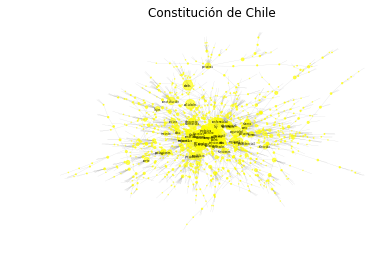

In [49]:
plot_graph(G)